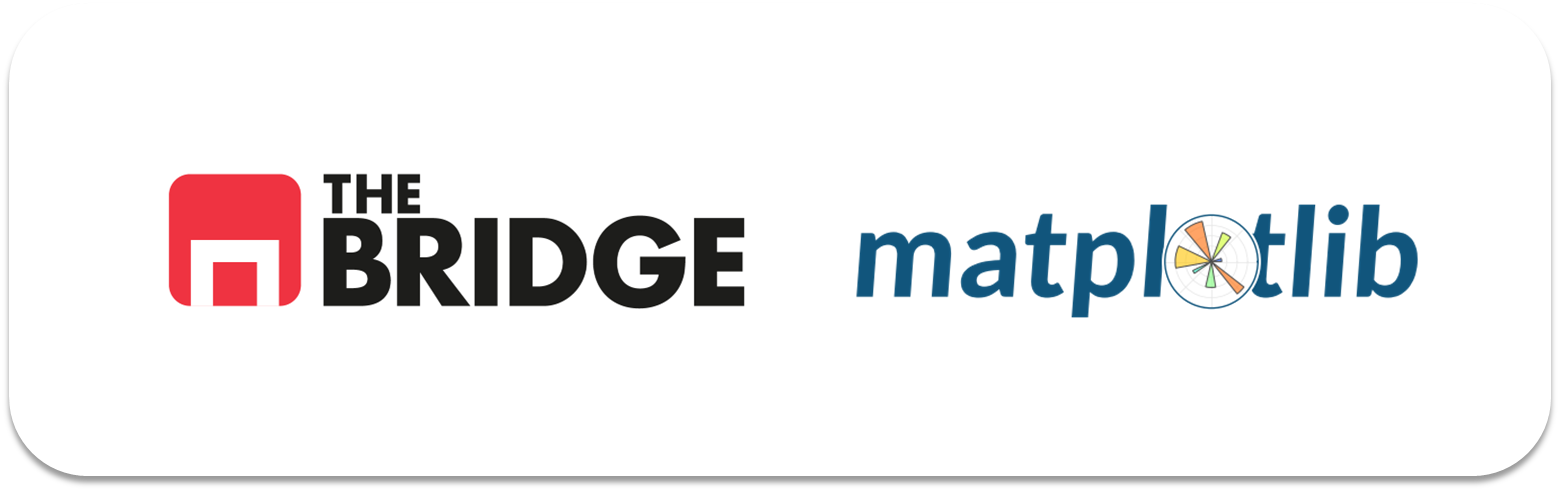

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [3]:

ruta = "./data/california_cities.csv"
df = pd.read_csv(ruta)

print("Primeras filas del dataset:")
print(df.head())

print("\nDescripción de las columnas numéricas:")
print(df.describe())

print("\nInformación del DataFrame:")
print(df.info())

df = df.dropna()

print("\nNúmero de nulos por columna después de eliminar filas con NaN:")
print(df.isna().sum())

Primeras filas del dataset:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand ITC", tamaño 18, color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

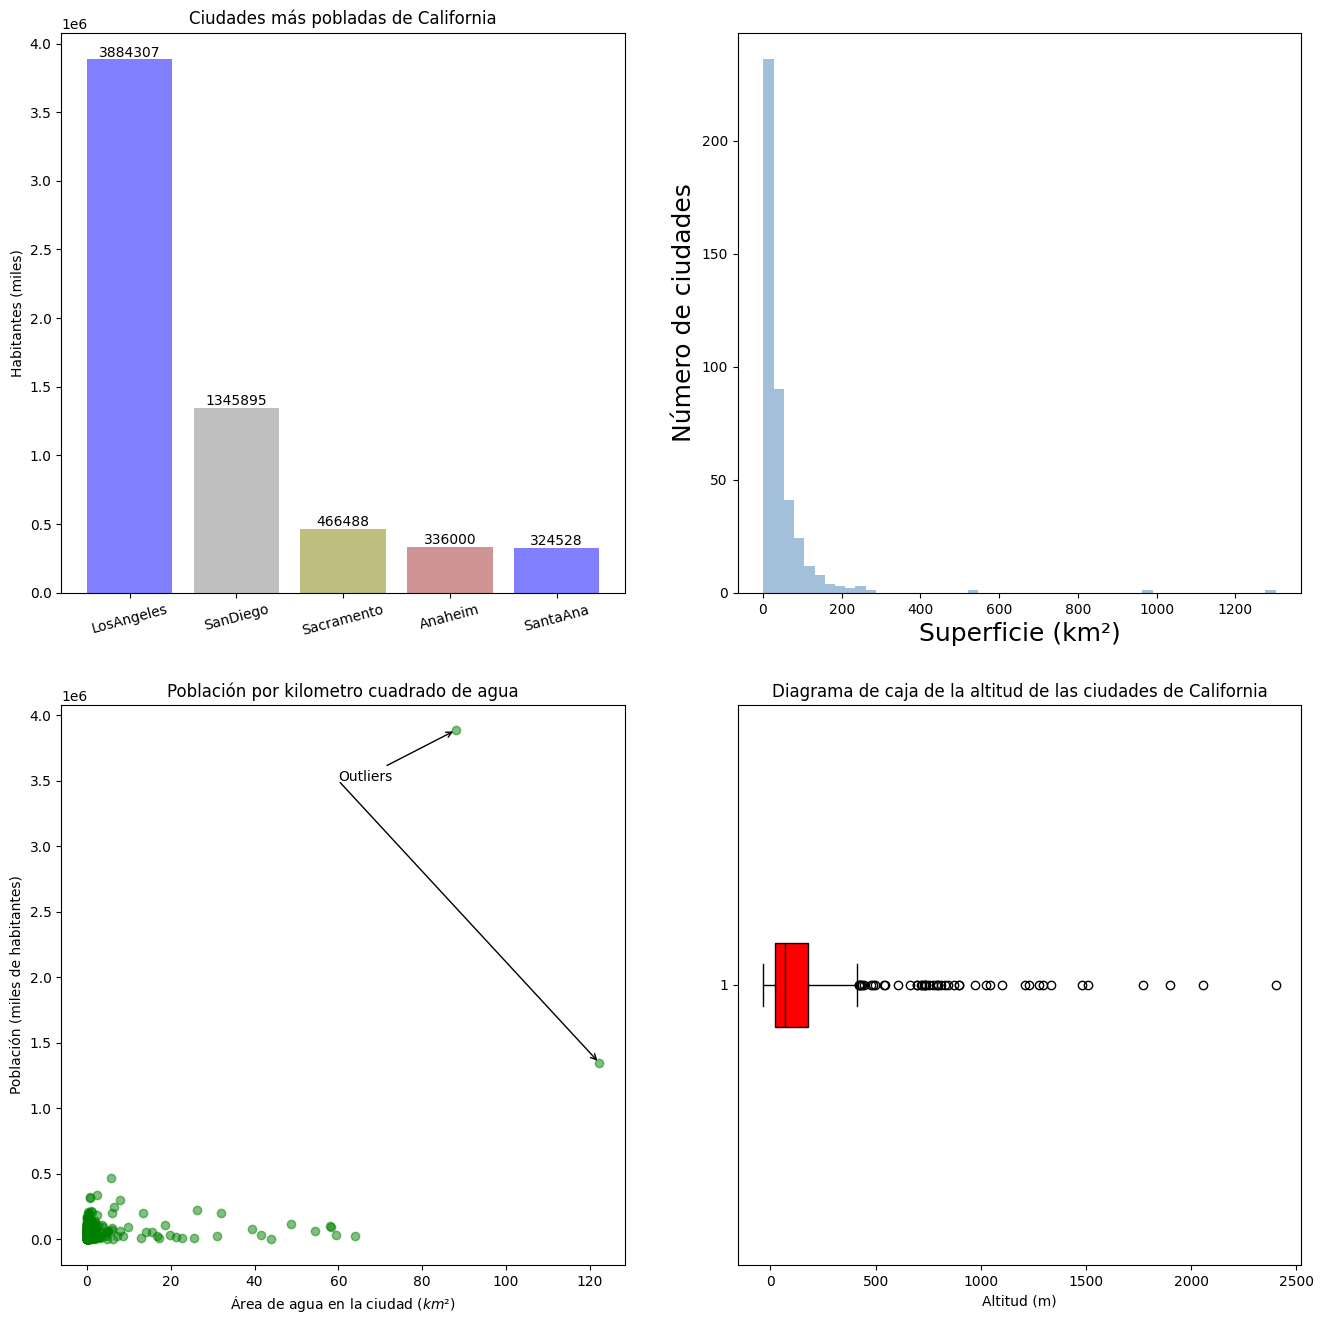

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Son 4 colores, pero 5 ciudades
top_cities = df.sort_values("population_total", ascending=False).head(5)
x_pos = range(len(top_cities))
colors = ["blue", "grey", "olive", "brown"]

ax1 = axes[0, 0]
ax1.bar(
    x_pos,
    top_cities["population_total"],
    color=colors,
    alpha=0.5
)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(top_cities["city"], rotation=15)
ax1.set_title("Ciudades más pobladas de California")
ax1.set_ylabel("Habitantes (miles)")

for i, value in enumerate(top_cities["population_total"]):
    ax1.text(
        i,
        value,
        str(int(value)),
        ha="center",
        va="bottom"
    )
ax2 = axes[0, 1]
ax2.hist(
    df["area_total_km2"],
    bins=50,
    # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
    color="steelblue",
    alpha=0.5
)

ax2.set_xlabel("Superficie (km²)", 
               # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
               fontsize=18)
ax2.set_ylabel("Número de ciudades", 
               # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
               fontsize=18)
ax3 = axes[1, 0]
ax3.scatter(
    df["area_water_km2"],
    df["population_total"],
    c="green",
    alpha=0.5
)
# estan a mano también, ya que indicaba aquellos que estuviesen por encima del 0.95 y me salían puntos que no eran
outliers = df[
    (df["population_total"] > 1_000_000) &
    (df["area_water_km2"] > 80)
]

props_flecha = {"arrowstyle": "->"}

for i, (_, row) in enumerate(outliers.iterrows()):
    ax3.annotate(
        "Outliers" if i == 0 else "",
        xy=(row["area_water_km2"], row["population_total"]),
        xytext=(60, 3500000), # he puesto los valores a mano, fijandome en el gráfico de ejemplo
        arrowprops=props_flecha
    )

ax3.set_xlabel("Área de agua en la ciudad ($km²$)")
ax3.set_ylabel("Población (miles de habitantes)")
ax3.set_title("Población por kilometro cuadrado de agua")
ax4 = axes[1, 1]
ax4.boxplot(
    df["elevation_m"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="red"),
    medianprops=dict(color="black", linewidth=1)
)

ax4.set_xlabel("Altitud (m)")
ax4.set_title("Diagrama de caja de la altitud de las ciudades de California");


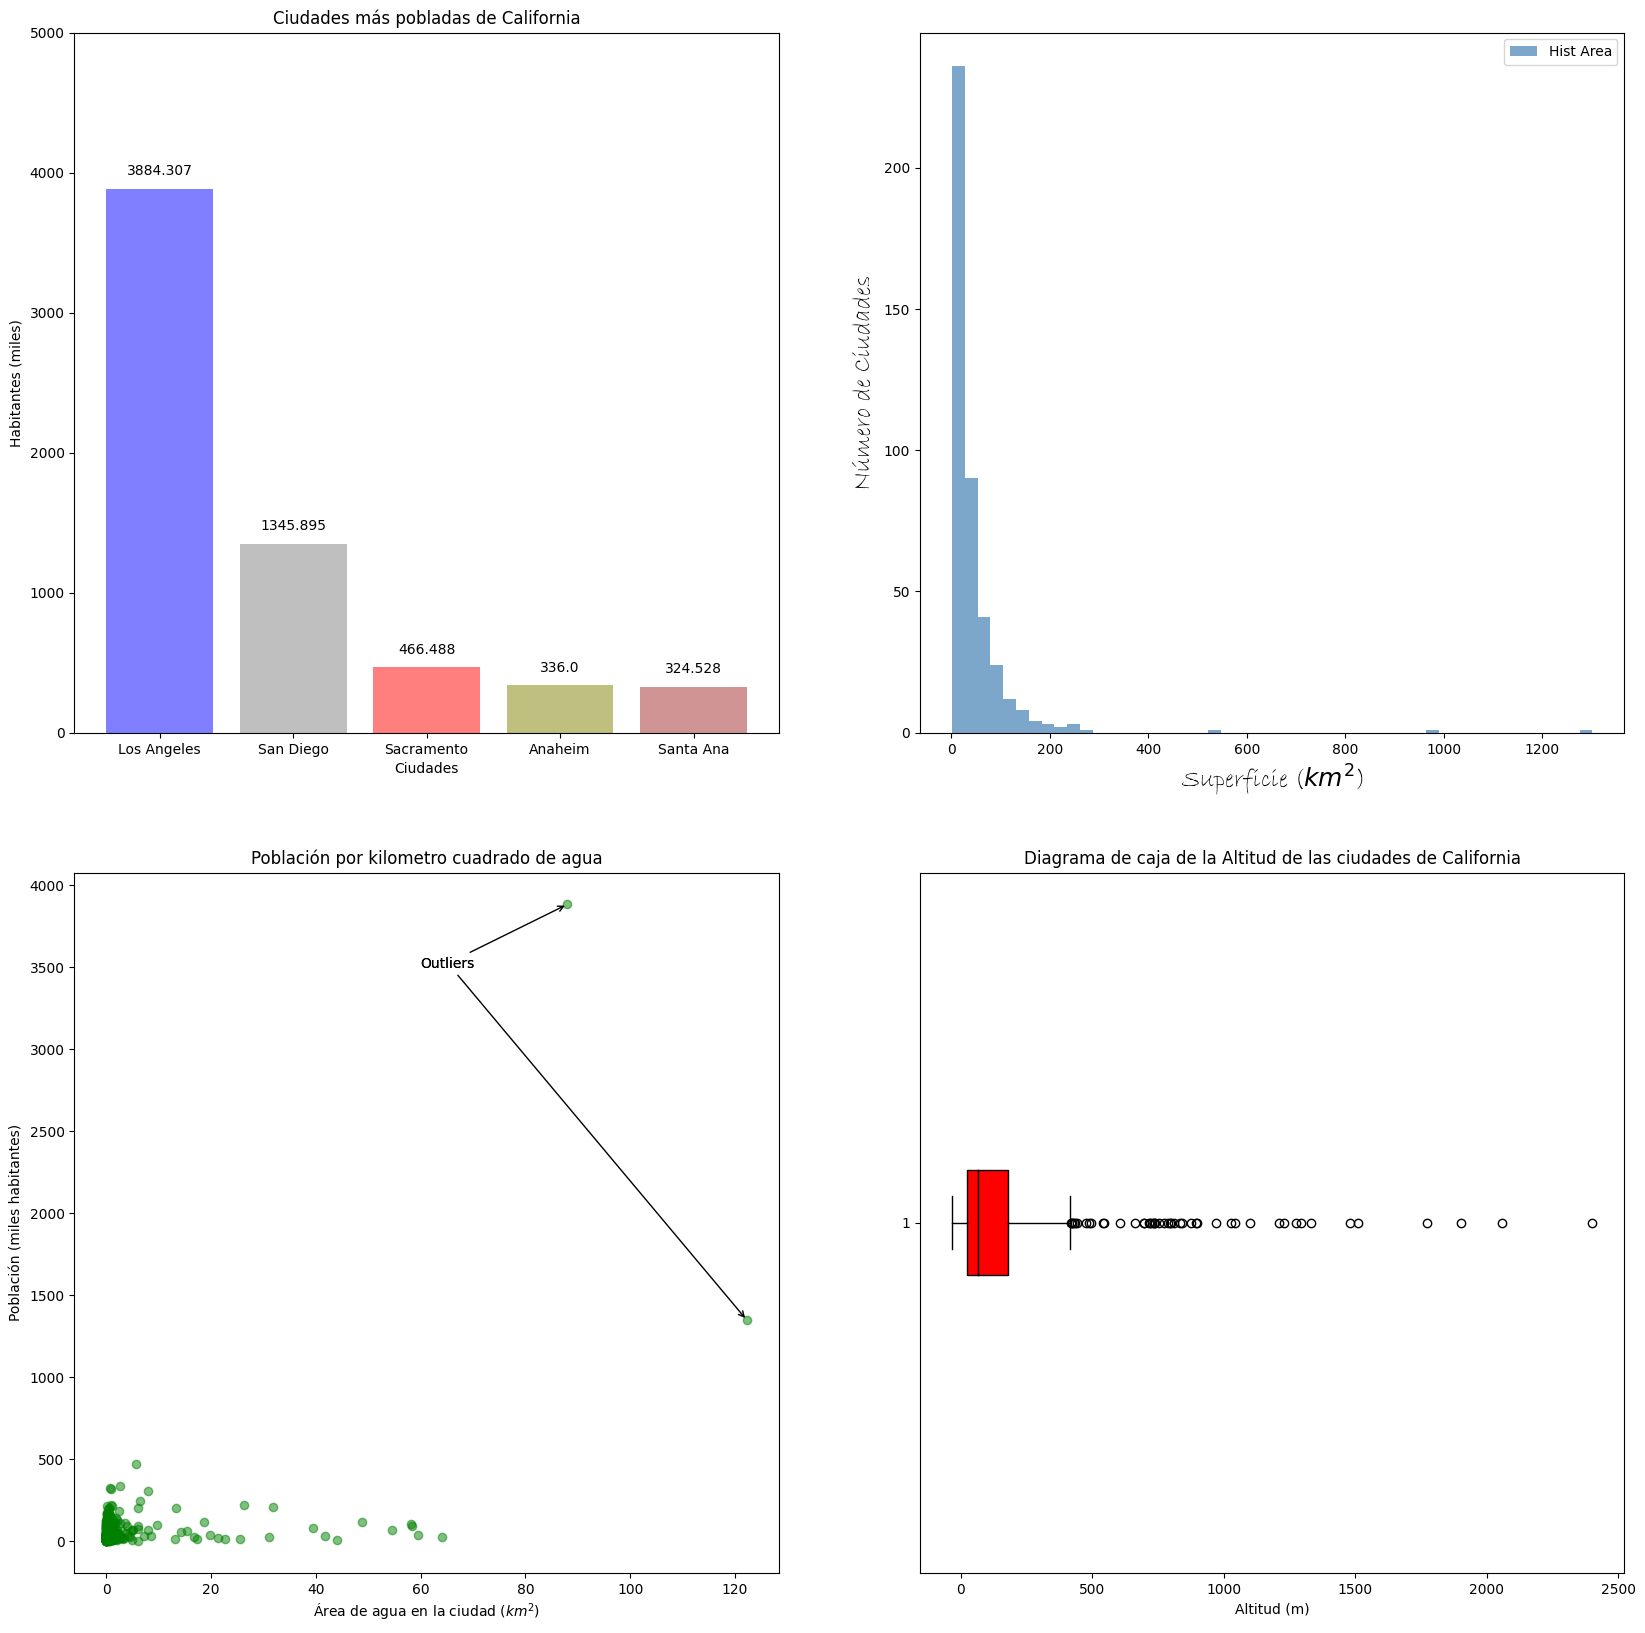

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

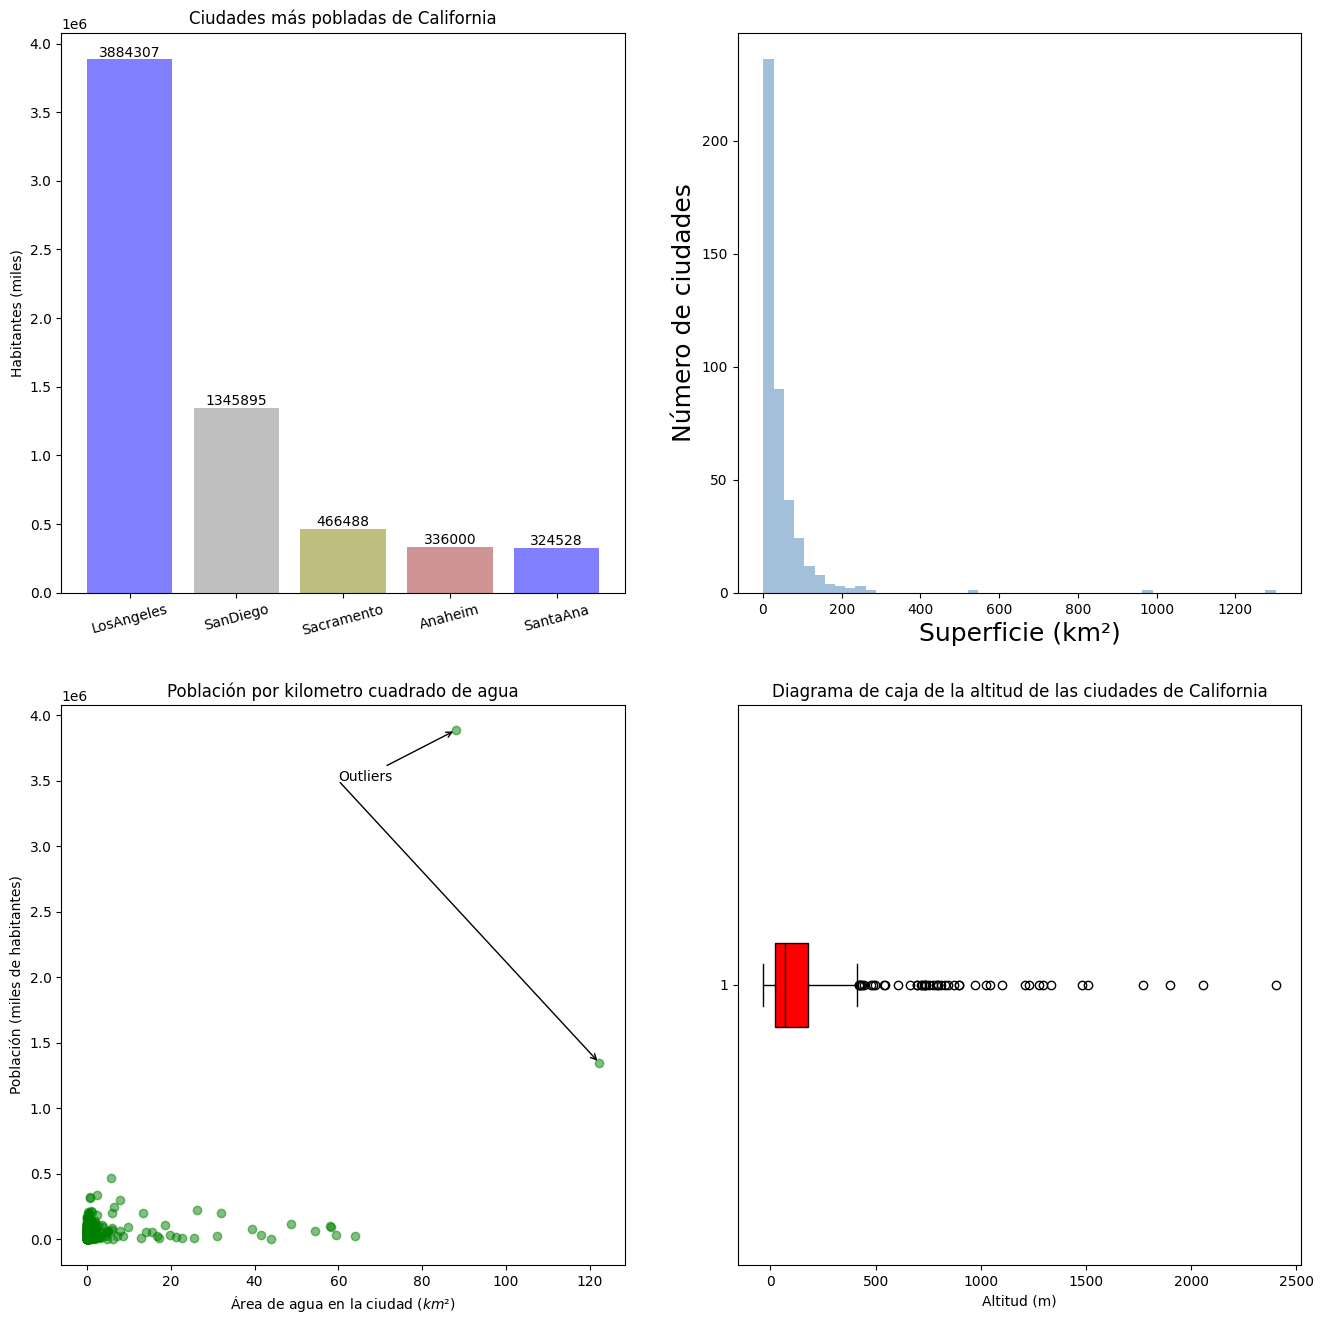

In [94]:
#incluyo el anteror ejercicio y aqui lo gravbo en png#
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Son 4 colores, pero 5 ciudades
top_cities = df.sort_values("population_total", ascending=False).head(5)
x_pos = range(len(top_cities))
colors = ["blue", "grey", "olive", "brown"]

ax1 = axes[0, 0]
ax1.bar(
    x_pos,
    top_cities["population_total"],
    color=colors,
    alpha=0.5
)

ax1.set_xticks(x_pos)
ax1.set_xticklabels(top_cities["city"], rotation=15)
ax1.set_title("Ciudades más pobladas de California")
ax1.set_ylabel("Habitantes (miles)")

for i, value in enumerate(top_cities["population_total"]):
    ax1.text(
        i,
        value,
        str(int(value)),
        ha="center",
        va="bottom"
    )
ax2 = axes[0, 1]
ax2.hist(
    df["area_total_km2"],
    bins=50,
    # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
    color="steelblue",
    alpha=0.5
)

ax2.set_xlabel("Superficie (km²)", 
               # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
               fontsize=18)
ax2.set_ylabel("Número de ciudades", 
               # fontname="Bradley Hand ITC", # no lo encuentra por lo que lo comento
               fontsize=18)
ax3 = axes[1, 0]
ax3.scatter(
    df["area_water_km2"],
    df["population_total"],
    c="green",
    alpha=0.5
)
# estan a mano también, ya que indicaba aquellos que estuviesen por encima del 0.95 y me salían puntos que no eran
outliers = df[
    (df["population_total"] > 1_000_000) &
    (df["area_water_km2"] > 80)
]

props_flecha = {"arrowstyle": "->"}

for i, (_, row) in enumerate(outliers.iterrows()):
    ax3.annotate(
        "Outliers" if i == 0 else "",
        xy=(row["area_water_km2"], row["population_total"]),
        xytext=(60, 3500000), # he puesto los valores a mano, fijandome en el gráfico de ejemplo
        arrowprops=props_flecha
    )

ax3.set_xlabel("Área de agua en la ciudad ($km²$)")
ax3.set_ylabel("Población (miles de habitantes)")
ax3.set_title("Población por kilometro cuadrado de agua")
ax4 = axes[1, 1]
ax4.boxplot(
    df["elevation_m"],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="red"),
    medianprops=dict(color="black", linewidth=1)
)

ax4.set_xlabel("Altitud (m)")
ax4.set_title("Diagrama de caja de la altitud de las ciudades de California");

fig.savefig("figura_california.png", dpi=300)